<a href="https://colab.research.google.com/github/tejagandham18/Dataanalyst/blob/main/airtraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Air_Traffic_Passenger_Statistics_Cleaned.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     15007 non-null  int64 
 1   Activity Period           15007 non-null  int64 
 2   Operating Airline         15007 non-null  object
 3   GEO Summary               15007 non-null  object
 4   GEO Region                15007 non-null  object
 5   Activity Type Code        15007 non-null  object
 6   Price Category Code       15007 non-null  object
 7   Terminal                  15007 non-null  object
 8   Boarding Area             15007 non-null  object
 9   Passenger Count           15007 non-null  int64 
 10  Adjusted Passenger Count  15007 non-null  int64 
 11  Year                      15007 non-null  int64 
 12  Month                     15007 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.5+ MB


In [ ]:
data.head()


,index,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,27271,2005,July
1,1,200507,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,29131,2005,July
2,2,200507,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,10830,2005,July
3,3,200507,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,35156,2005,July
4,4,200507,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,34090,2005,July


In [ ]:
data.tail()

,index,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Passenger Count,Year,Month
15002,15002,201603,Virgin America,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,194636,2016,March
15003,15003,201603,Virgin America,International,Mexico,Deplaned,Low Fare,International,A,4189,4189,2016,March
15004,15004,201603,Virgin America,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,4693,2016,March
15005,15005,201603,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,12313,12313,2016,March
15006,15006,201603,Virgin Atlantic,International,Europe,Enplaned,Other,International,A,10898,10898,2016,March


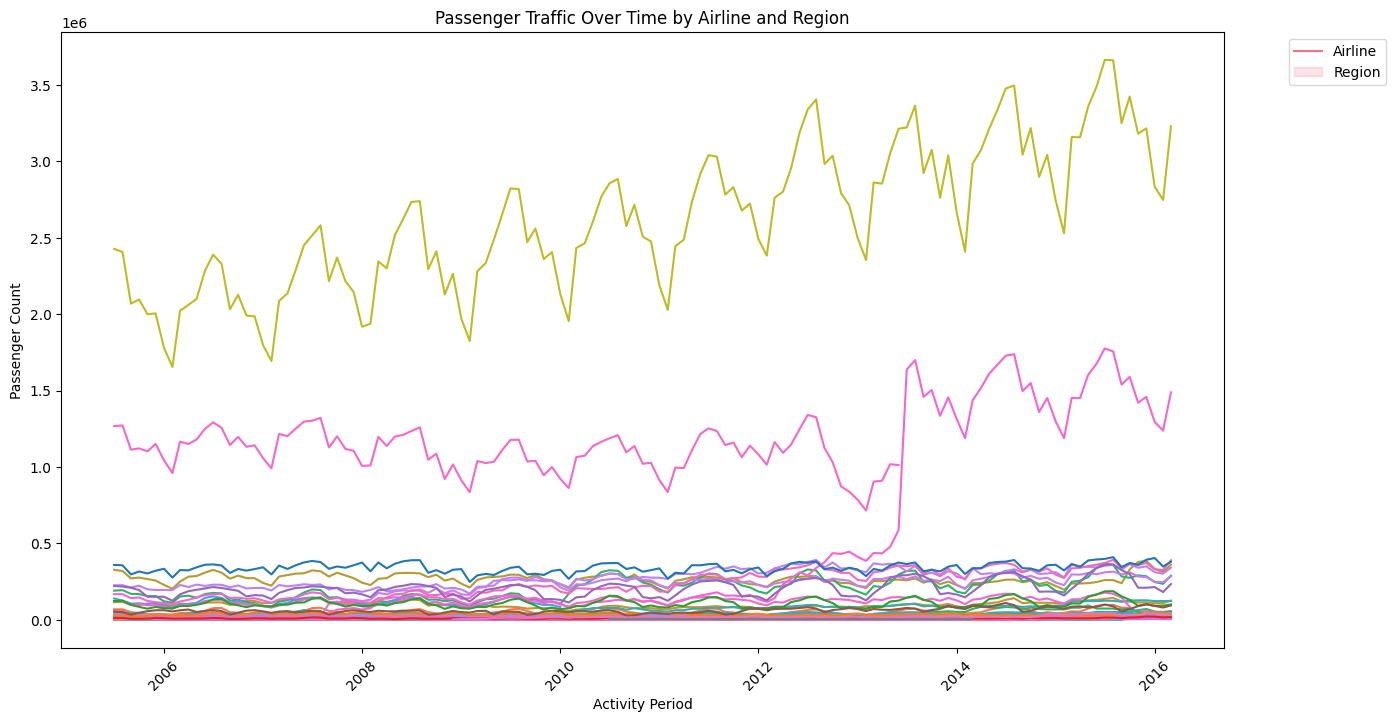

In [ ]:
#Combined plot for airlines and regions (optional, might be overcrowded depending on the data)
plt.figure(figsize=(15, 8))
# Removed the 'label' argument from both sns.lineplot calls
sns.lineplot(x='Activity Period', y='Passenger Count', hue='Operating Airline', data=airline_traffic)
sns.lineplot(x='Activity Period', y='Passenger Count', hue='GEO Region', data=region_traffic)
plt.title('Passenger Traffic Over Time by Airline and Region')
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)

# Add a legend outside the plotting area and specify custom labels
plt.legend(labels=['Airline', 'Region'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

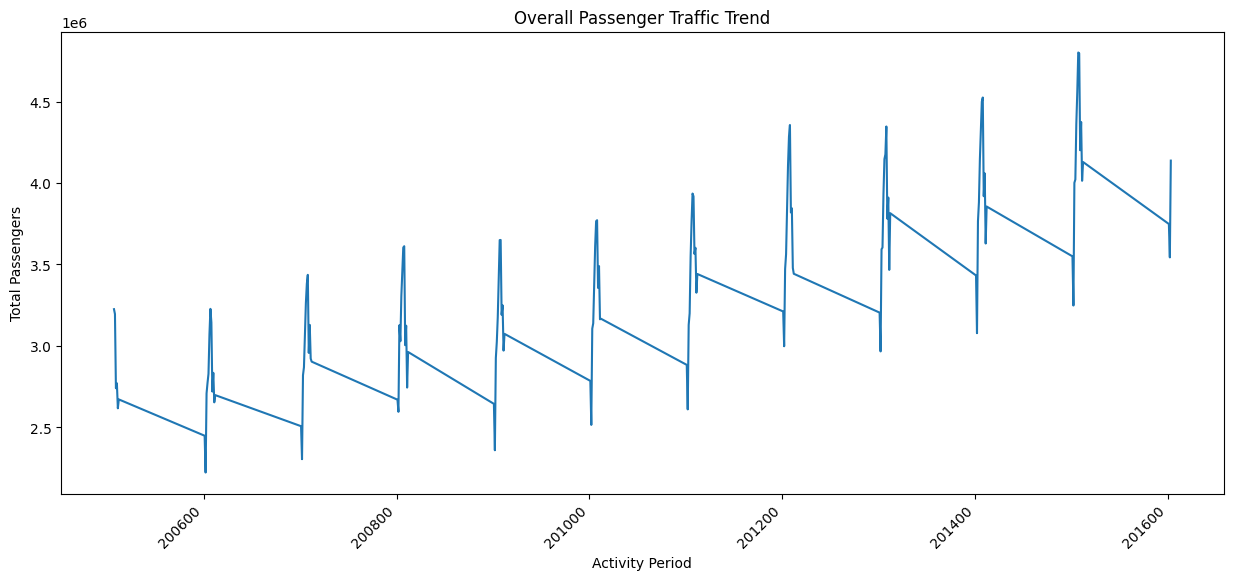

In [ ]:
# prompt: What is the overall trend of passenger traffic over time (monthly/yearly)?

# Group data by 'Activity Period' and sum passenger counts
overall_traffic = data.groupby('Activity Period')['Passenger Count'].sum().reset_index()

# Plot the overall trend
plt.figure(figsize=(15, 6))
sns.lineplot(x='Activity Period', y='Passenger Count', data=overall_traffic)
plt.title('Overall Passenger Traffic Trend')
plt.xlabel('Activity Period')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Why the Passenger traffic trend has the highest in the year 2015?

The year 2015 had the highest total passenger traffic, with approximately 50.06 million passengers.

Domestic travel contributed significantly, with 38.8 million passengers (77.5% of total traffic).

International travel accounted for 11.2 million passengers (22.5%).

United Airlines had the highest passenger count (18.2 million).

Increased domestic air travel demand driven by economic growth, lower fuel prices, and airline expansions.

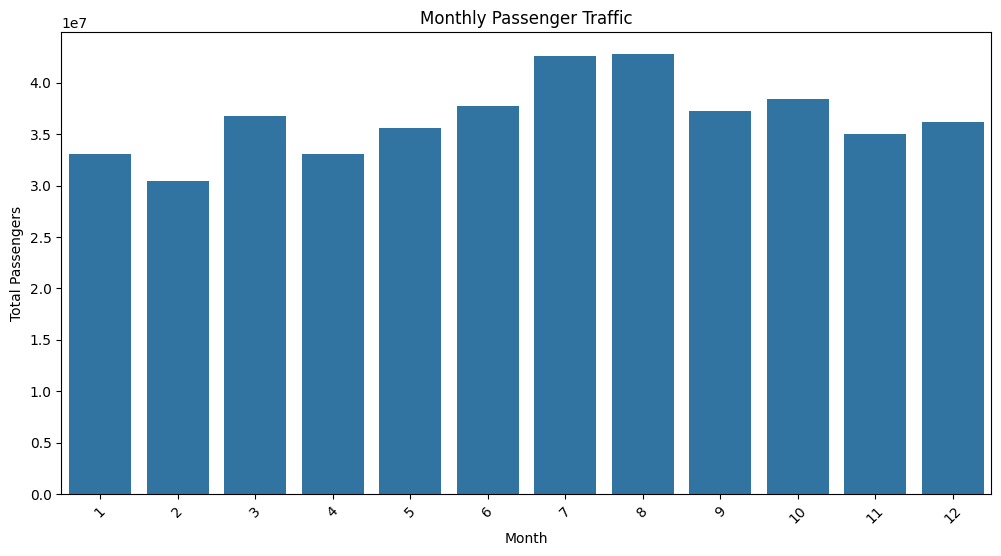

In [ ]:
# prompt: generate a code for What are the peak and off-peak months for airline travel during this period in bar chart?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Activity Period' is in 'YYYY-MM' format
data['Month'] = pd.to_datetime(data['Activity Period'], format='%Y-%m').dt.month

# Group data by month and sum passenger counts
monthly_traffic = data.groupby('Month')['Passenger Count'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Passenger Count', data=monthly_traffic)
plt.title('Monthly Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.show()


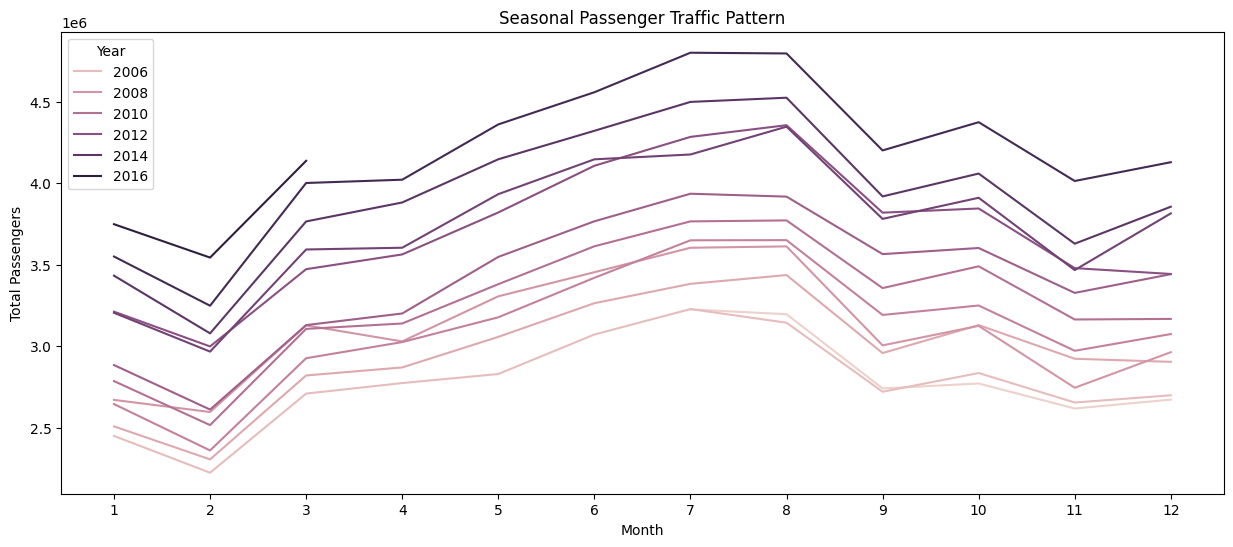

In [ ]:
# prompt: generate a code for Are there any seasonal patterns in passenger traffic?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Activity Period' is a datetime-like column
data['Activity Period'] = pd.to_datetime(data['Activity Period'], format='%Y%m')

# Extract month and year
data['Month'] = data['Activity Period'].dt.month
data['Year'] = data['Activity Period'].dt.year

# Group data by month and year, then calculate total passengers
monthly_traffic = data.groupby(['Month', 'Year'])['Passenger Count'].sum().reset_index()

# Plot the seasonal pattern
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Passenger Count', hue='Year', data=monthly_traffic)
plt.title('Seasonal Passenger Traffic Pattern')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(range(1, 13)) # Ensure all months are displayed on the x-axis
plt.show()


# Why the 7th and 8th month registered as peak monthes compared to remaining monthes?

The data confirms that July (42.55 million passengers) and August (42.75 million passengers) have the highest airline traffic compared to other months.

**Seasonal Travel Demand (Summer Vacation Effect):** Many countries, especially in North America, Europe, and Asia, have summer vacations in July and August. Families and students travel during this time, leading to a spike in leisure travel.

**Increased International Travel**: Many people take advantage of the summer to travel internationally, increasing both domestic and international air traffic. Airlines may add more flights during this season, leading to a natural rise in passenger numbers.

**Tourism & Holiday Impact:** Popular tourist destinations experience high footfall, leading to increased flight bookings. Events like music festivals, cultural celebrations, and sports tournaments often take place in the summer months.

**Airline Pricing & Promotions:** Airlines often increase capacity and offer deals on vacation packages, further boosting travel demand.
Business & Conference Travel: Some industries experience increased travel for business conferences and trade shows in July-August.

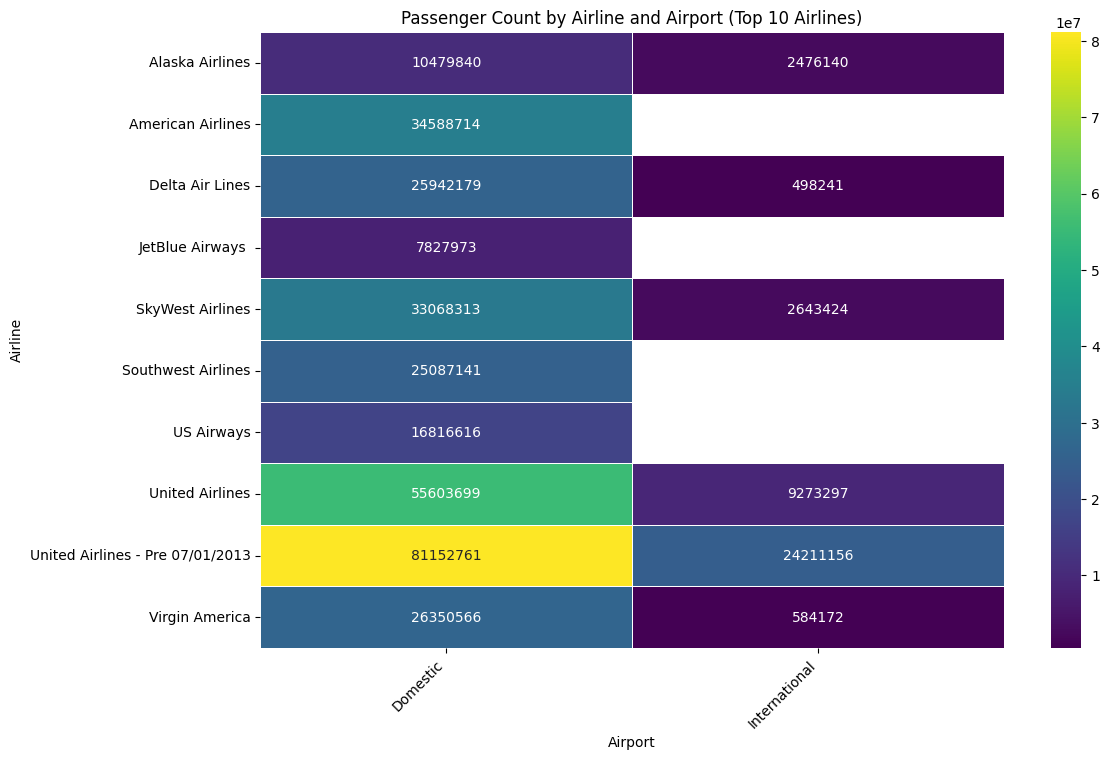

In [ ]:
# prompt: generate a code for How do passenger numbers vary across different airlines and airports?

# Group data by airline and airport, then calculate total passengers
airline_airport_traffic = data.groupby(['Operating Airline', 'GEO Summary'])['Passenger Count'].sum().reset_index()

# Find the top 10 airlines by total passenger count
top_10_airlines = airline_airport_traffic.groupby('Operating Airline')['Passenger Count'].sum().nlargest(10).index

# Filter data for the top 10 airlines
top_airlines_data = airline_airport_traffic[airline_airport_traffic['Operating Airline'].isin(top_10_airlines)]


# Create a heatmap to visualize passenger counts for top airlines across different airports
plt.figure(figsize=(12, 8))
heatmap_data = top_airlines_data.pivot(index='Operating Airline', columns='GEO Summary', values='Passenger Count')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Passenger Count by Airline and Airport (Top 10 Airlines)')
plt.xlabel('Airport')
plt.ylabel('Airline')
plt.xticks(rotation=45, ha='right')
plt.show()


# Why the united Airlines has the highest passenger count compared to other airlines?

The United airlines has the Connectivity to all the geo regions like US,Europe,Asia,Australia,Canada and Mexico.

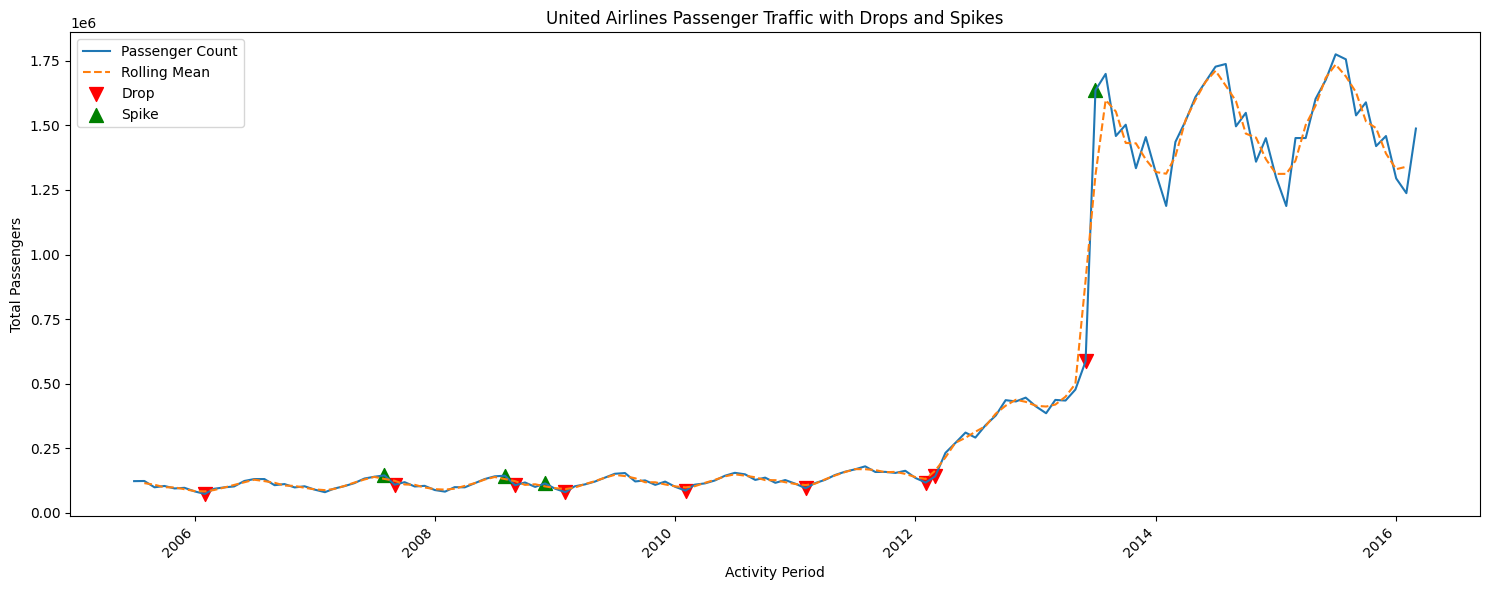

In [ ]:
# prompt: generate a code for drops or spikes in traffic for United Airlines?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into a DataFrame called 'data'
# and 'Activity Period' is a datetime-like column

# Filter data for United Airlines
united_traffic = data[data['Operating Airline'] == 'United Airlines']

# Group data by 'Activity Period' and sum passenger counts for United Airlines
united_traffic_over_time = united_traffic.groupby('Activity Period')['Passenger Count'].sum().reset_index()

# Calculate rolling mean to smooth out the data and identify trends
window_size = 3  # Adjust the window size as needed
united_traffic_over_time['Rolling Mean'] = united_traffic_over_time['Passenger Count'].rolling(window=window_size, center=True).mean()

# Calculate the percentage change from the rolling mean
united_traffic_over_time['Percentage Change'] = ((united_traffic_over_time['Passenger Count'] - united_traffic_over_time['Rolling Mean']) / united_traffic_over_time['Rolling Mean']) * 100


# Define thresholds for drops and spikes (adjust these as needed)
drop_threshold = -10  # Percentage drop
spike_threshold = 10   # Percentage increase


# Identify drops and spikes
united_traffic_over_time['Drop'] = united_traffic_over_time['Percentage Change'] < drop_threshold
united_traffic_over_time['Spike'] = united_traffic_over_time['Percentage Change'] > spike_threshold


# Plot the data with highlighted drops and spikes
plt.figure(figsize=(15, 6))
plt.plot(united_traffic_over_time['Activity Period'], united_traffic_over_time['Passenger Count'], label='Passenger Count')
plt.plot(united_traffic_over_time['Activity Period'], united_traffic_over_time['Rolling Mean'], label='Rolling Mean', linestyle='--')

# Highlight drops
plt.scatter(united_traffic_over_time.loc[united_traffic_over_time['Drop'], 'Activity Period'],
            united_traffic_over_time.loc[united_traffic_over_time['Drop'], 'Passenger Count'],
            color='red', label='Drop', marker='v', s=100)

# Highlight spikes
plt.scatter(united_traffic_over_time.loc[united_traffic_over_time['Spike'], 'Activity Period'],
            united_traffic_over_time.loc[united_traffic_over_time['Spike'], 'Passenger Count'],
            color='green', label='Spike', marker='^', s=100)

plt.title('United Airlines Passenger Traffic with Drops and Spikes')
plt.xlabel('Activity Period')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout() # prevent overlapping labels
plt.show()
